<a href="https://colab.research.google.com/github/ahao1010/Predict_diamond_price/blob/main/ML_diamond_bancuoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/diamonds.csv',index_col='Unnamed: 0')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
new_col_order = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z','price']
df = df.reindex(columns=new_col_order)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
df.duplicated().sum()

146

In [7]:
df=df.drop_duplicates()

In [8]:
df.describe()

,carat,depth,table,x,y,z,price
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714,3933.065082
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037,3988.114460
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000,5326.750000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [9]:
df= df.drop(df[df['x']==0].index)
df= df.drop(df[df['y']==0].index)
df= df.drop(df[df['z']==0].index)

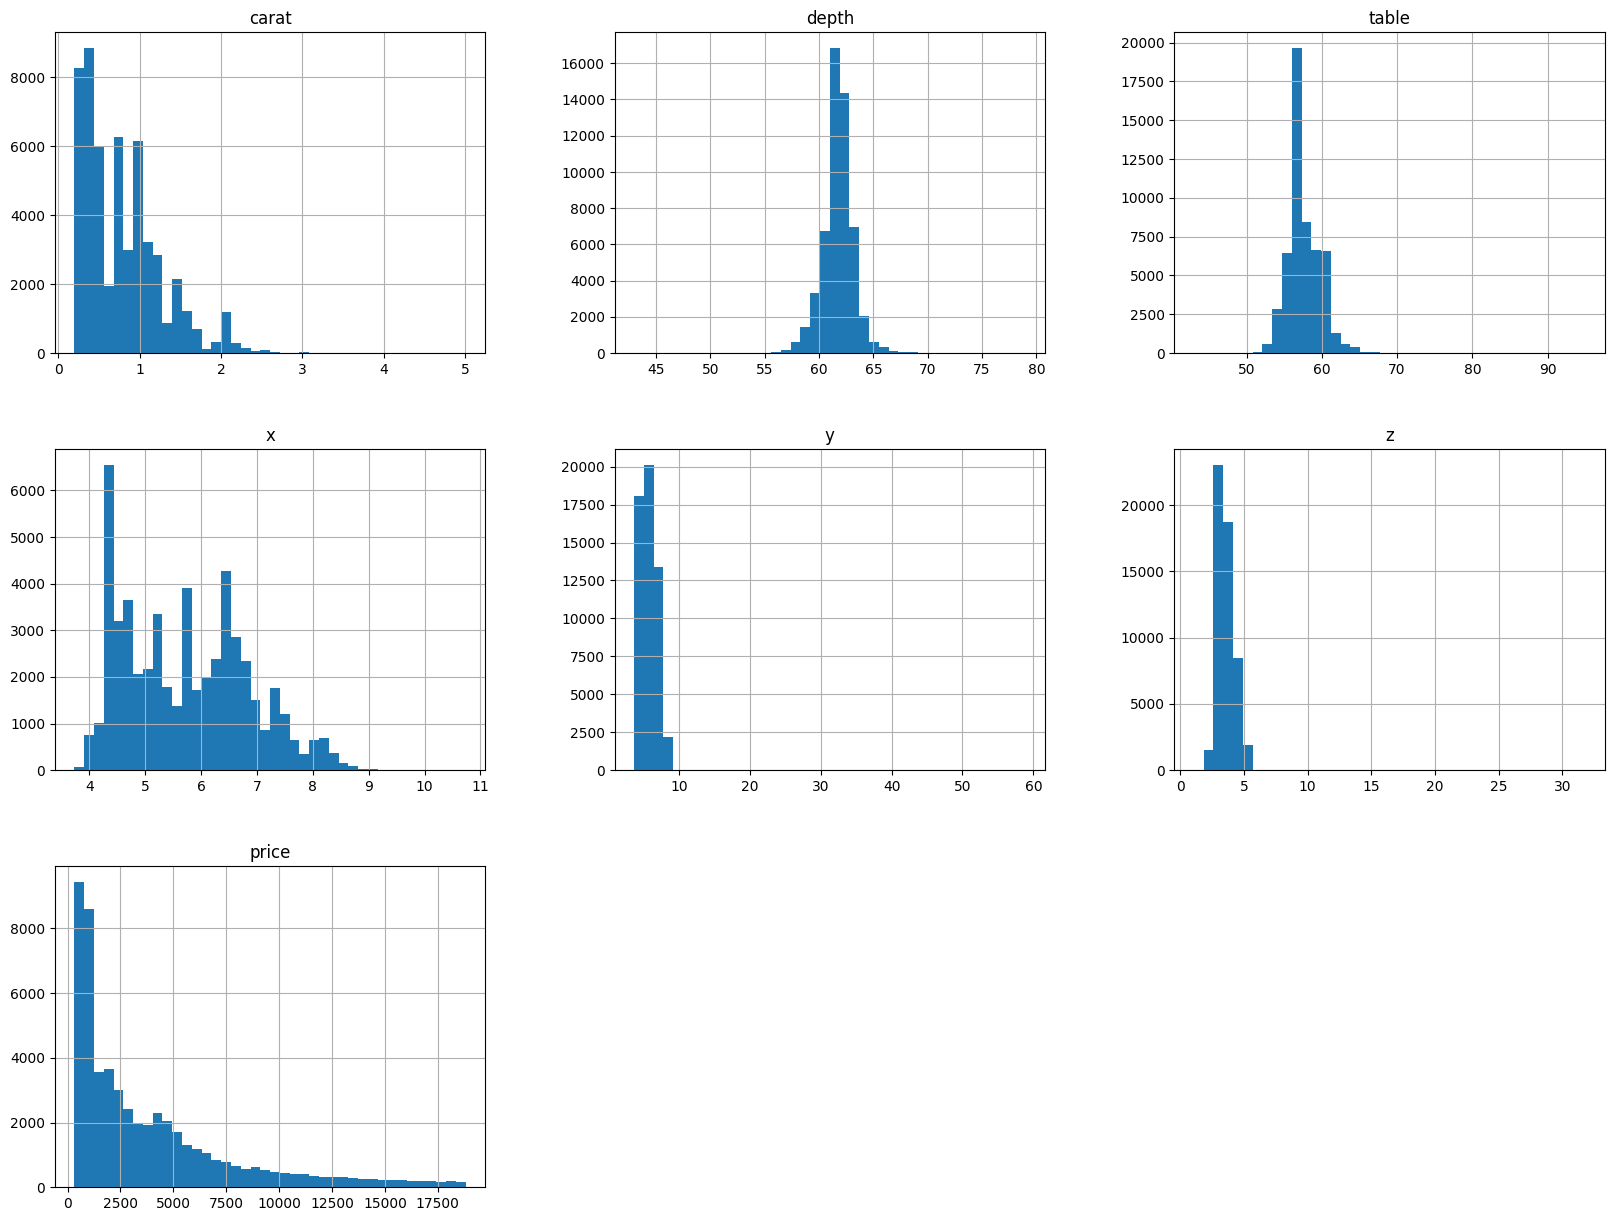

In [10]:
df.hist(bins = 40, figsize = (20, 15))
plt.show()



1. Data Preprocessing


In [11]:
a=list(df.columns)
for i in a:
  print(df[i].value_counts())
  print('------------------------------')

0.30    2596
0.31    2238
1.01    2238
0.70    1981
0.32    1827
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64
------------------------------
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: cut, dtype: int64
------------------------------
G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: color, dtype: int64
------------------------------
SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: clarity, dtype: int64
------------------------------
62.0    2233
61.9    2160
61.8    2069
62.2    2032
62.1    2010
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64
------------------------------
56.0    9849
57.0    9695
58.0    8349
59.0    6555
55.0    6242
        ... 
51.6       1
63.5       1
43.0       1
62

In [12]:
Le = LabelEncoder()
df['cut'] = Le.fit_transform(df['cut'])
cut_mappings = {index: label for index, label in enumerate(Le.classes_)}
df['color'] = Le.fit_transform(df['color'])
color_mappings = {index: label for index, label in enumerate(Le.classes_)}
df['clarity'] = Le.fit_transform(df['clarity'])
clarity_mappings = {index: label for index, label in enumerate(Le.classes_)}
print(cut_mappings)
print(color_mappings)
print(clarity_mappings)


{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}
{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
{0: 'I1', 1: 'IF', 2: 'SI1', 3: 'SI2', 4: 'VS1', 5: 'VS2', 6: 'VVS1', 7: 'VVS2'}


In [13]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
3,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53938,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


[Text(0, 0, 'carat'),
 Text(1, 0, 'cut'),
 Text(2, 0, 'color'),
 Text(3, 0, 'clarity'),
 Text(4, 0, 'depth'),
 Text(5, 0, 'table'),
 Text(6, 0, 'x'),
 Text(7, 0, 'y'),
 Text(8, 0, 'z'),
 Text(9, 0, 'price')]

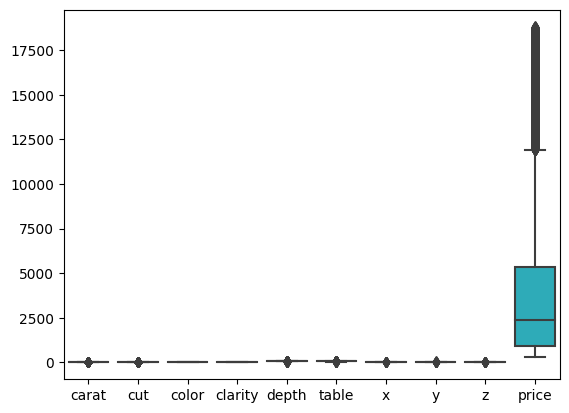

In [14]:
columns= list(df.columns)
fig= sns.boxplot(data=df)
fig.set_xticks(range(len(columns)))
fig.set_xticklabels(columns)

In [15]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr
df_without_outlier = df[-((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5* iqr))).any(axis=1)]
df_without_outlier

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,336
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53938,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


[Text(0, 0, 'carat'),
 Text(1, 0, 'cut'),
 Text(2, 0, 'color'),
 Text(3, 0, 'clarity'),
 Text(4, 0, 'depth'),
 Text(5, 0, 'table'),
 Text(6, 0, 'x'),
 Text(7, 0, 'y'),
 Text(8, 0, 'z'),
 Text(9, 0, 'price')]

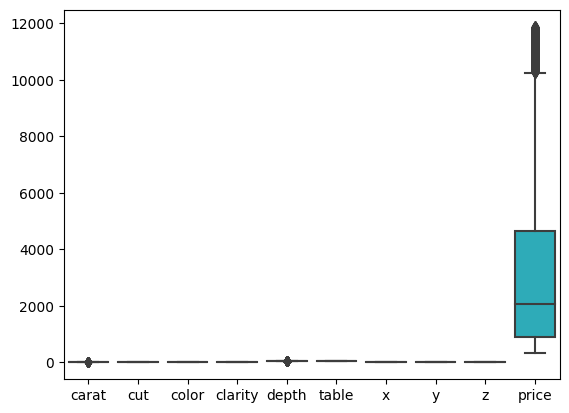

In [16]:
fig= sns.boxplot(data=df_without_outlier)
fig.set_xticks(range(len(columns)))
fig.set_xticklabels(columns)

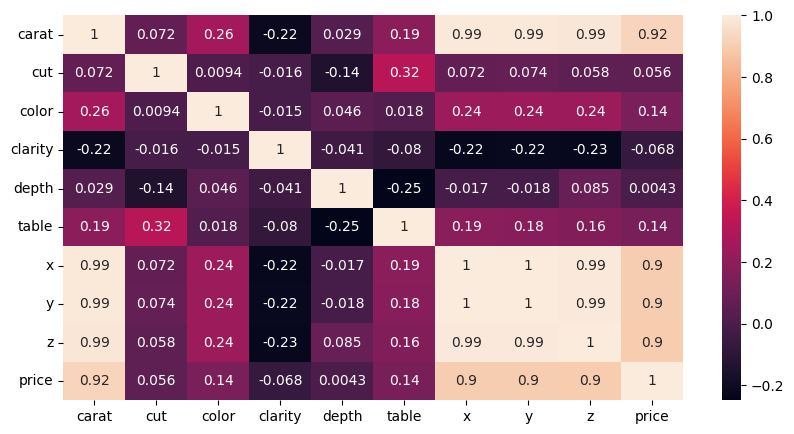

In [17]:
corr_matrix = df_without_outlier.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
X=df_without_outlier.drop(['price'],axis=1)
y= df_without_outlier['price']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=101)

In [19]:
print(f"x_train shape: {X_train.shape}\nx_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (37665, 9)
x_test shape: (9417, 9)
y_train shape: (37665,)
y_test shape: (9417,)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2. Training Model



2.1 Decision Tree

In [21]:
model= DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred_id3= model.predict(X_test)

2.2 RandomForest

In [22]:
model= RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_rd= model.predict(X_test)

2.4 KNN

In [23]:
model= KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred_knn= model.predict(X_test)

2.5 Linear Regression

In [24]:
model= LinearRegression()
model.fit(X_train,y_train)
y_pred_ln= model.predict(X_test)

3. Đánh giá mô hình

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
listForModels = ["Decision Tree", "Kneighbor Regression", "Random Forest","Linear Regression"]
listForPredictions = [y_pred_id3,y_pred_knn , y_pred_rd,y_pred_ln]
def comparisonModels(listForModels,listForPredictions,y_test):
    for modelName, predictions in zip(listForModels, listForPredictions):
        mae = round(mean_absolute_error(y_test,predictions), 1)
        r2 = round(r2_score(y_test,predictions), 2)
        mape = round(mean_absolute_percentage_error(y_test,predictions)*100, 1)
        print(f"Model Name: {modelName}")
        print(f"Mean Absoulute Error: {mae}")
        print(f"R-Score: {r2}")
        print(f"Mean Absoulute Percentage Error: {mape}%")
        print("\n")
comparisonModels(listForModels,listForPredictions,y_test)

Model Name: Decision Tree
Mean Absoulute Error: 262.7
R-Score: 0.97
Mean Absoulute Percentage Error: 8.0%


Model Name: Kneighbor Regression
Mean Absoulute Error: 304.7
R-Score: 0.96
Mean Absoulute Percentage Error: 10.6%


Model Name: Random Forest
Mean Absoulute Error: 198.9
R-Score: 0.98
Mean Absoulute Percentage Error: 6.2%


Model Name: Linear Regression
Mean Absoulute Error: 608.0
R-Score: 0.89
Mean Absoulute Percentage Error: 29.8%




In [ ]:
X

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53938,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [ ]:
X_test

array([[-0.55842804, -0.31809828, -1.61874921, -0.41028308, -0.47990188,
        -0.40453573],
       [-0.55842804,  0.87024507,  0.36707869, -0.50221087, -0.45935664,
        -0.42105675],
       [-0.77456242, -0.31809828, -1.12229223, -0.75756584, -0.72644476,
        -0.71843517],
       ...,
       [-0.96368001,  1.46441675, -0.12937828, -1.04356341, -1.01407811,
        -1.03233461],
       [-1.098764  ,  1.46441675, -1.6683949 , -1.27848998, -1.25034837,
        -1.23058689],
       [-0.53141124,  0.2760734 , -0.62583526, -0.45113987, -0.42853878,
        -0.40453573]])

In [ ]:
y_test

39774     1094
45801     1710
41498     1233
41407     1224
13617     5571
         ...  
23653    11690
45936     1722
39931      491
37940      486
46377     1762
Name: price, Length: 14125, dtype: int64